## 符号付きグラフから統計的推論による拡散確立の変化を求める
このスクリプトは、スケールフリーなソーシャルネットワーク上で偽情報と修正情報の拡散過程を探索します。ネットワーク内の各ノードはエージェントを表し、各エージェントは中立、偽情報、または修正情報のいずれかの状態を持ちます。特に、ベイズ理論に基づく更新を使用して、各エージェントが情報をどのように拡散するかを評価します。シミュレーションの結果として、偽情報と修正情報の拡散確率の変化を視覚化し、情報拡散のダイナミクスを理解出来ることを目標としました。<br>

### 大まかな手順
**1.初期設定**<BR>
・エージェント（ノード）の数を100<BR>
・修正情報を拡散するエージェントの初期数を2<BR>
・偽情報を拡散する確率0.6<BR>
・修正情報を拡散する確率0.1<BR>
・シミュレーションの反復回数10<BR>
・修正情報の発信を開始するイテレーション数の遅延5<BR>

**2.ネットワークの生成**<br>
スケールフリーなソーシャルネットワークを生成するために、BAモデルを使用します。ネットワークは100ノードで構成され、各ノードは平均で3つの新しいエッジを持ちます。<br>
・ノード数 $N$ および各ノードの初期接続数 $m$ を設定します。<BR>
・新しいノードを追加し、既存のノードに $m$ 本のエッジをランダムに接続します。この接続は既存ノードの次数に比例して行われます（優先的選択）。<br>

**3.エッジに符号を追加（符号付きグラフ）**<br>
エッジに符号を持たせることでネットワークの関係性（正＝ポジティブ、負＝ネガティブ）を考慮した情報拡散が可能になります。正の符号を付ける確率を $p$ とし、負の符号を付ける確率を $1−p$ とします。ここで、スクリプトでは $p=0.7$ と設定しています。これによりネットワークのリアリズムが向上し、より複雑な情報拡散のシナリオをシミュレーションできます。<br>

**4.ノードの初期化**<br>
各ノードの初期状態を「中立」に設定します。次に、次数の最も高いノードを偽情報拡散者として設定し、ランダムに選ばれた2つのノードを修正情報拡散者として設定します。<br>
・中立（neutral）<BR>
・偽情報（fake）<BR>
・修正情報（correction）<BR>

**5.最も次数の高いノードを偽情報発信者に設定する**<br>
最も次数の高いノードの上位3つからランダムに一つを選び、偽情報発信者に設定することで、インフルエンサーの影響力を反映することが期待できます。<br>

**6.ベイズ更新を用いた情報の拡散**<br>
ベイズ更新は、ある事象 $A$ に対する事前確率 $P(A)$ を、観測データ $B$ を基に事後確率 $P(A∣B)$ に更新する手法です。数式は以下の通りです。<br>
$P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}$<br>

このスクリプトでは、以下の形でベイズ更新を適用しています。<br>
$P_{\text{new}} = \frac{L \cdot P}{L \cdot P + (1-L) \cdot (1-P)}$<br>

ここで、$P$ は事前確率、$L$ は尤度（この場合は信頼度を考慮した拡散確率）、$E$ は観測データです。<br>
ベイズ更新を用いることで、各ノードの偽情報および修正情報拡散確率が動的に変化します。より現実的な情報拡散モデルを提供し、ノードが新しい情報を受け取るたびにその確率を更新することで、ネットワーク内の情報拡散パターンが複雑化します。<br>
偽情報を拡散する確率 $P fake​$<BR>
修正情報を拡散する確率 $P correction​$<br>

**7.符号付きネットワークのバランス評価**<br>
各イテレーションの後、ノードの状態数（中立、偽情報、修正情報）をカウントし、ネットワークの状態を視覚化します。また、各イテレーションにおける偽情報と修正情報の平均確率をプロットします。<br>
**Φメソッド**<br>
符号付きネットワークのバランスを評価するために、以下のように定義されたΦメソッドを使用します<br>
$\Phi = \frac{E_{\text{total}}}{E_{\text{balanced}}}$<br>
<br>
    
**補足）** 符号付きグラフとベイズ更新は、以下のような効果が期待できます。

**情報拡散のリアリズム向上：** エッジに符号を追加し、ノードの信頼度を考慮することで、ネットワーク内の関係性を考慮した情報拡散が可能になり、より現実的なシナリオをシミュレートできます。具体的には、信頼度の高いノードからの情報はより広がりやすく、信頼度の低いノードからの情報は広がりにくくなります。<br>
**ダイナミックな情報拡散パターン：** ベイズ更新を導入することで、ノードの情報拡散確率が動的に変化し、複雑な拡散パターンを観察できます。これにより、ネットワーク内での情報拡散の挙動をより詳細かつ現実的に理解することができます。<br>

### ストーリー
このスクリプトでは、修正情報発信者はシミュレーションの開始時に設定されますが、修正情報の発信自体は特定のイテレーション数が経過するまでは行われません。そのため、シミュレーションの最初の段階では偽情報が広まりやすくなり、設定した遅延が経過した後に修正情報が発信され始めるという流れになります。具体的なストーリーとして考えられるのは以下の通りです。<br>

**イテレーション 1：** 修正情報発信者が存在するが、修正情報はまだ発信されない。偽情報発信者が偽情報を拡散し始める。<br>
**イテレーション 2-4：** 偽情報が拡散し続ける。修正情報はまだ発信されない。<br>
**イテレーション 5（iteration_delay の経過後）：** 修正情報の発信が始まる。偽情報と修正情報の拡散が同時に進行する。<br>
**以降のイテレーション：** 偽情報と修正情報がノード間で競い合いながら拡散される。<br>

このシミュレーションにより、偽情報が初期段階で爆発的に広まる様子を観察し、その後修正情報がそれをどのように抑制していくかを確認できます。この設定は、実際のソーシャルネットワークにおける情報拡散の動態をより現実的に再現するための一つの方法です。

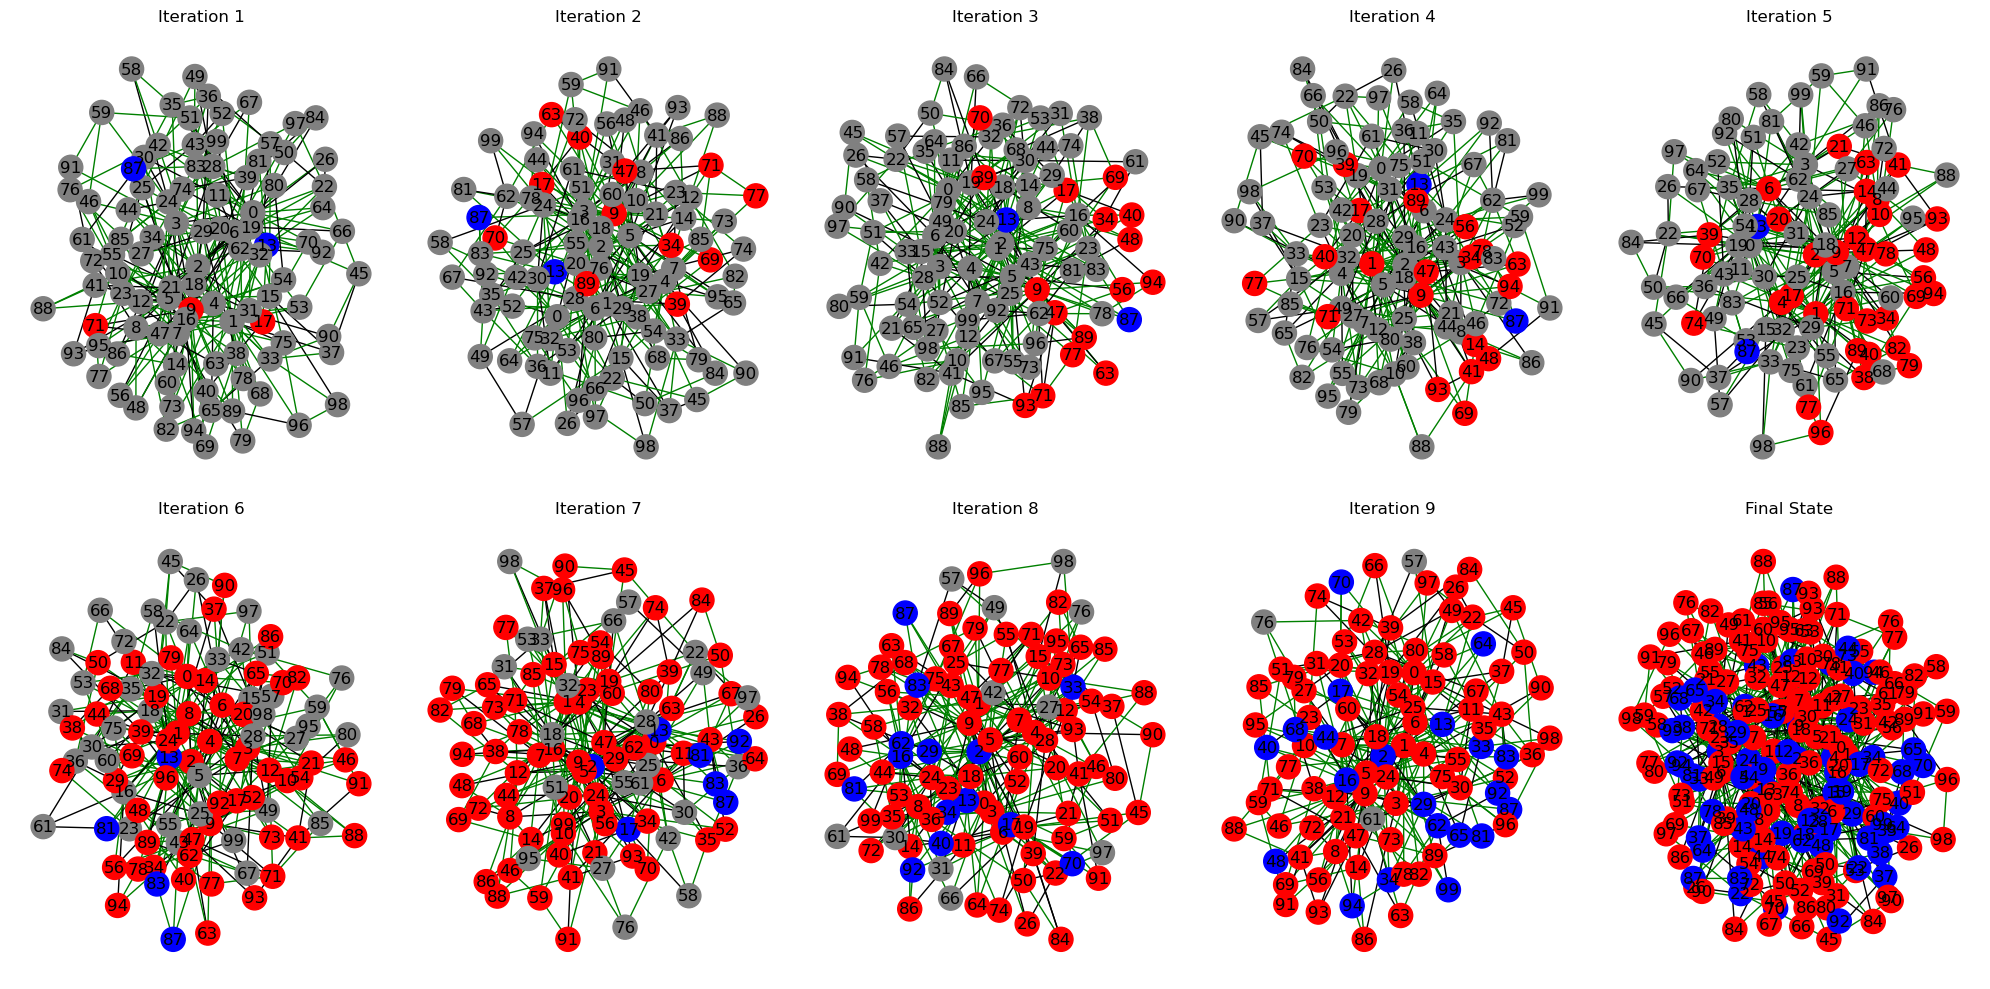

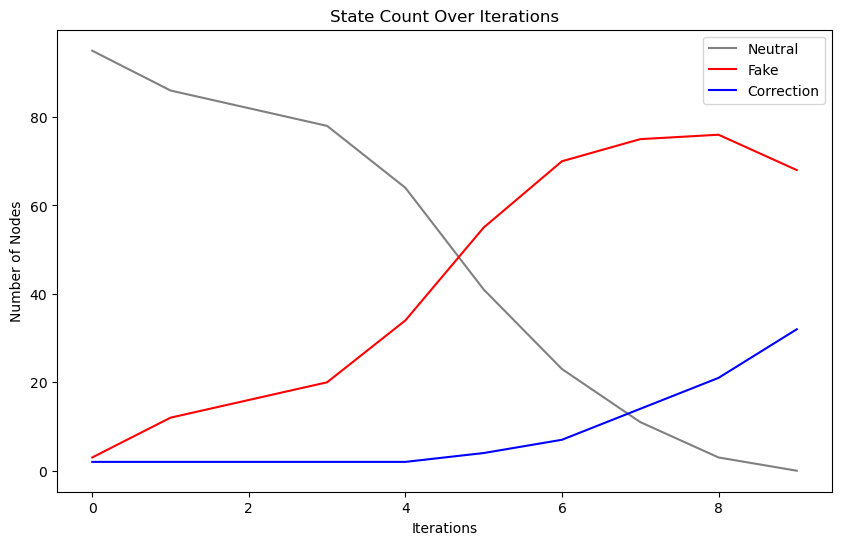

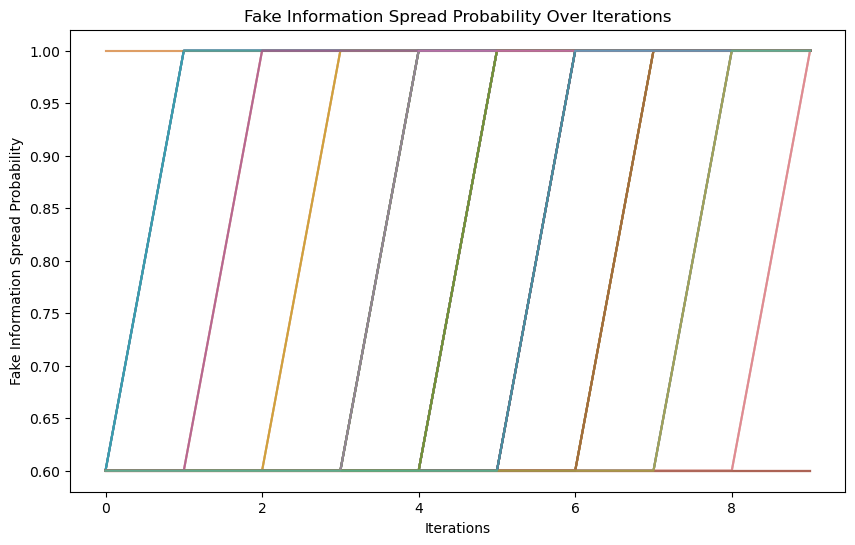

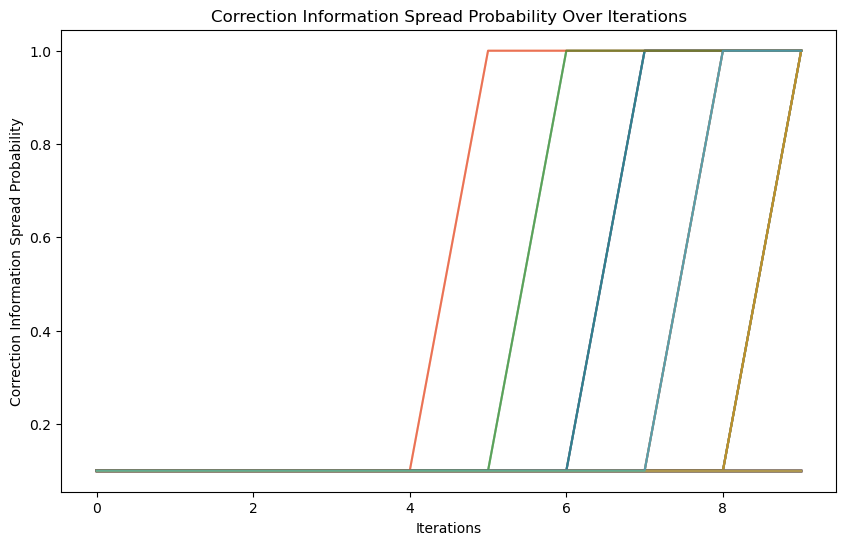

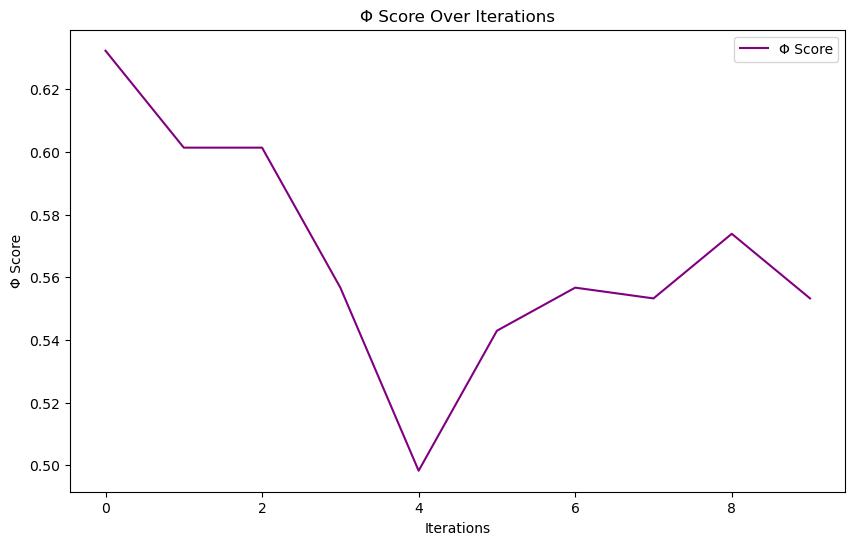

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# 初期設定
num_nodes = 100  # エージェントの数
initial_correction_spreaders = 2  # 修正情報を拡散するエージェントの初期数
fake_spread_prob = 0.6  # 偽情報を拡散する確率
correction_spread_prob = 0.1  # 修正情報を拡散する確率
iterations = 10  # シミュレーションの反復回数
iteration_delay = 5  # 修正情報の発信を開始するイテレーション数の遅延

# スケールフリーなソーシャルネットワークの生成
G = nx.barabasi_albert_graph(num_nodes, 3)

# エッジに符号（正または負）を追加
positive_ratio = 0.7
negative_ratio = 0.3

for u, v in G.edges:
    if random.random() < positive_ratio:
        G.edges[u, v]['sign'] = 1
    else:
        G.edges[u, v]['sign'] = -1

# ノードの属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = 'neutral'
    G.nodes[node]['fake_prob'] = fake_spread_prob
    G.nodes[node]['correction_prob'] = correction_spread_prob
    G.nodes[node]['trust'] = random.uniform(0.5, 1.0)  # 信頼度をランダムに設定

# グラフを可視化する関数
def visualize_graph(G, title, ax):
    color_map = {'neutral': 'gray', 'fake': 'red', 'correction': 'blue'}
    edge_color_map = {1: 'green', -1: 'black'}
    colors = [color_map[G.nodes[node]['state']] for node in G.nodes]
    edge_colors = [edge_color_map[G.edges[edge]['sign']] for edge in G.edges]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=colors, edge_color=edge_colors, with_labels=True, node_size=300, ax=ax)
    ax.set_title(title)

# 次数の高いノードを特定し、最も次数の高いノードの一つを偽情報発信者に設定する
highest_degree_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
highest_degree_node = random.choice(highest_degree_nodes[:3])[0]  # 上位3つからランダムに選択
G.nodes[highest_degree_node]['state'] = 'fake'
initial_fake_nodes = [highest_degree_node]

# 初期の修正情報発信者を設定する関数
def set_initial_correction_spreaders(G, initial_correction_spreaders):
    neutral_nodes = [node for node in G.nodes if G.nodes[node]['state'] == 'neutral']
    chosen_nodes = random.sample(neutral_nodes, initial_correction_spreaders)
    for node in chosen_nodes:
        G.nodes[node]['state'] = 'correction'

# ベイズ更新を用いた情報の拡散を行う関数
def bayesian_update(prior, likelihood, evidence):
    return (likelihood * prior) / ((likelihood * prior) + ((1 - evidence) * (1 - prior)))

# 情報の拡散を行う関数
def spread_information(G, iteration, delay):
    new_states = {}
    for node in G.nodes:
        if G.nodes[node]['state'] == 'neutral':
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = random.choice(neighbors)
                if G.nodes[chosen_neighbor]['state'] == 'fake':
                    # 信頼度を考慮した偽情報の拡散確率
                    adjusted_fake_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['fake_prob']
                    G.nodes[node]['fake_prob'] = bayesian_update(G.nodes[node]['fake_prob'], adjusted_fake_prob, 1)
                    if random.random() < G.nodes[node]['fake_prob']:
                        new_states[node] = 'fake'
                elif G.nodes[chosen_neighbor]['state'] == 'correction' and iteration >= delay:
                    # 信頼度を考慮した修正情報の拡散確率
                    adjusted_correction_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['correction_prob']
                    G.nodes[node]['correction_prob'] = bayesian_update(G.nodes[node]['correction_prob'], adjusted_correction_prob, 1)
                    if random.random() < G.nodes[node]['correction_prob']:
                        new_states[node] = 'correction'
        elif G.nodes[node]['state'] == 'fake':
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = random.choice(neighbors)
                if G.nodes[chosen_neighbor]['state'] == 'correction' and iteration >= delay:
                    # 信頼度を考慮した修正情報の拡散確率
                    adjusted_correction_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['correction_prob']
                    G.nodes[node]['correction_prob'] = bayesian_update(G.nodes[node]['correction_prob'], adjusted_correction_prob, 1)
                    if random.random() < G.nodes[node]['correction_prob']:
                        new_states[node] = 'correction'
    
    for node, new_state in new_states.items():
        G.nodes[node]['state'] = new_state

# 状態数をカウントする関数
def count_states(G):
    state_count = {'neutral': 0, 'fake': 0, 'correction': 0}
    for node in G.nodes:
        state = G.nodes[node]['state']
        state_count[state] += 1
    return state_count

# 各ノードの確率を記録するための関数
def record_probabilities(G, fake_probs, correction_probs):
    fake_probs.append([G.nodes[node]['fake_prob'] for node in G.nodes])
    correction_probs.append([G.nodes[node]['correction_prob'] for node in G.nodes])

# 符号付きネットワークのバランスを評価するΦメソッド
def phi_method(G):
    balanced_edges = 0
    total_edges = len(G.edges)
    for u, v in G.edges:
        if G.edges[u, v]['sign'] == 1 and G.nodes[u]['state'] == G.nodes[v]['state']:
            balanced_edges += 1
        elif G.edges[u, v]['sign'] == -1 and G.nodes[u]['state'] != G.nodes[v]['state']:
            balanced_edges += 1
    return balanced_edges / total_edges

# 初期の修正情報発信者を設定
set_initial_correction_spreaders(G, initial_correction_spreaders)

# シミュレーションの実行と状態数の記録
state_counts = {'neutral': [], 'fake': [], 'correction': []}
fake_probabilities = []
correction_probabilities = []
phi_scores = []

fig, axs = plt.subplots(2, (iterations + 1) // 2, figsize=(20, 10))
axs = axs.flatten()

for i in range(iterations):
    spread_information(G, i, iteration_delay)
    current_state_count = count_states(G)
    for state, count in current_state_count.items():
        state_counts[state].append(count)
    record_probabilities(G, fake_probabilities, correction_probabilities)
    phi_score = phi_method(G)
    phi_scores.append(phi_score)
    visualize_graph(G, f"Iteration {i + 1}", axs[i])

# 最終状態の可視化
visualize_graph(G, "Final State", axs[-1])
plt.tight_layout()
plt.show()

# イテレーションごとの状態数をプロットする
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), state_counts['neutral'], label='Neutral', color='gray')
plt.plot(range(iterations), state_counts['fake'], label='Fake', color='red')
plt.plot(range(iterations), state_counts['correction'], label='Correction', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Number of Nodes')
plt.title('State Count Over Iterations')
plt.legend()
plt.show()

# 確率の変化をプロットする
plt.figure(figsize=(10, 6))
for i in range(num_nodes):
    plt.plot(range(iterations), [fake_probabilities[j][i] for j in range(iterations)], label=f'Node {i} Fake Prob', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Fake Information Spread Probability')
plt.title('Fake Information Spread Probability Over Iterations')
plt.show()

plt.figure(figsize=(10, 6))
for i in range(num_nodes):
    plt.plot(range(iterations), [correction_probabilities[j][i] for j in range(iterations)], label=f'Node {i} Correction Prob', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Correction Information Spread Probability')
plt.title('Correction Information Spread Probability Over Iterations')
plt.show()

# Φスコアの変化をプロットする
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), phi_scores, label='Φ Score', color='purple')
plt.xlabel('Iterations')
plt.ylabel('Φ Score')
plt.title('Φ Score Over Iterations')
plt.legend()
plt.show()


**質問 1:** なぜスケールフリーなネットワークを選んだのですか？<BR>
**回答:** スケールフリーなネットワークは、現実世界の多くのネットワーク（例えば、ソーシャルネットワークやインターネット）と同様に、一部のノードが非常に高い接続度を持つという特性を持っています。この特性により、情報の拡散や信頼性の影響を調査するのに適しています。<BR>

**質問 2:** 偽情報拡散確率（fake_spread_prob）と修正情報拡散確率（correction_spread_prob）の値はどのように決定しましたか？<BR>
**回答:** これらの確率は、シミュレーションのダイナミクスを観察するために設定したパラメータです。偽情報拡散確率を高めに設定し、修正情報拡散確率を低めに設定することで、現実のシナリオにおける偽情報の拡散と修正の難しさをモデル化しています。<BR>

**質問 3:** なぜノードの信頼度をランダムに設定したのですか？<BR>
**回答:** ノードの信頼度をランダムに設定することで、ネットワーク内の各ノードの異なる信頼性を反映しました。これにより、現実の社会的相互作用における個々の信頼度の影響をシミュレートしています。<BR>

**質問 4:** ベイズ更新の方法を使う理由は何ですか？<BR>
**回答:** ベイズ更新は、確率の更新に適した手法です。このシミュレーションでは、信頼度や情報の拡散確率が他のノードの影響を受けて変化するため、ベイズ更新を使用してこれらの確率を動的に更新しています。<BR>

**質問 5:** シミュレーションの反復回数（iterations）と修正情報の発信開始の遅延（iteration_delay）はどのように決定しましたか？<BR>
**回答:** これらのパラメータもシミュレーションのダイナミクスを観察するために設定しました。10回の反復は、ネットワーク内での情報拡散の変化を十分に観察するのに適しており、修正情報の発信を遅らせることで、偽情報が先に拡散するシナリオを再現しています。<BR>

**質問 6:** Phiメソッドを使用してネットワークのバランスを評価する理由は何ですか？<BR>
**回答:** Phiメソッドは、ネットワークのバランスを評価するための一つの指標です。エッジの符号（正または負）とノードの状態の一致度を評価することで、ネットワーク内のバランスを測定しています。このメソッドを使用することで、情報の拡散によるネットワークの構造的変化を定量化できます。<BR>

**質問 7:** 偽情報拡散確率と修正情報拡散確率の変化をプロットした理由は何ですか？<BR>
**回答:** これらの確率の変化をプロットすることで、シミュレーションの各ステップにおける情報拡散のダイナミクスを視覚的に理解することができます。特に、信頼度の影響を受けた確率の変動を観察することで、情報拡散プロセスの詳細な挙動を分析できます。<BR>

**質問 8:** Phiスコアの変化をプロットする意義は何ですか？<BR>
**回答:** Phiスコアの変化をプロットすることで、ネットワーク内のバランスがどのように変化するかを観察できます。これは、情報の拡散がネットワークの構造に与える影響を定量的に評価するために重要です。<BR>

**その他の関連する質問**<BR>
**質問 9:** このシミュレーションの結果は、どのように現実世界の情報拡散に適用できますか？<BR>
**回答:** シミュレーションの結果は、現実世界の情報拡散プロセスを理解するのに役立ちます。例えば、偽情報がどのように広まり、修正情報がどのようにそれを打ち消すか、また、ノードの信頼度が情報拡散に与える影響などを分析できます。<BR>

**質問 10:** 今後、どのような改良が考えられますか？<BR>
**回答:** 異なるネットワークモデルの使用、他の情報拡散モデルの適用、ノード属性やエッジ属性の多様化などが考えられます。また、実際のソーシャルネットワークデータを用いてシミュレーション結果を検証することも重要です。<BR>

このスクリプトは、LFRベンチマークグラフを生成し、偽情報と修正情報がスケールフリーなソーシャルネットワーク内でどのように拡散するかをシミュレーションするものです。まず、LFRベンチマークグラフを使用してコミュニティ構造を持つネットワークを生成します。このネットワークには、ノード間のエッジが存在し、各エッジには「信頼」や「不信」を示す符号（正または負）がランダムに割り当てられます。エッジの符号は情報の拡散における影響を決定する要素として機能します。

次に、各ノードには「中立」「偽情報」「修正情報」という3つの状態のいずれかが割り当てられます。スクリプトの初期設定では、全てのノードが中立状態で開始されますが、特定のノードに偽情報発信者が設定されます。このノードはネットワーク内で偽情報を拡散していきます。修正情報の拡散は、初期の遅延（iteration_delay）後に特定のノードで始まります。偽情報と修正情報の拡散プロセスは、ベイズ更新を使用して動的に計算され、隣接ノード間の信頼度に基づいて拡散確率が調整されます。

シミュレーションは、指定されたイテレーション数だけ反復され、各ステップでノードの状態が更新されます。各イテレーションでは、隣接ノードとの相互作用を通じて中立状態のノードが偽情報または修正情報に感染する可能性があります。これらの確率は、ノードの信頼度や、隣接ノードが持っている情報の種類に依存しています。

また、シミュレーションの途中で各ノードの状態数（中立、偽情報、修正情報）がカウントされ、各イテレーションごとに結果がグラフとして可視化されます。最終的な状態も可視化され、偽情報がどれだけ拡散し、修正情報がどの程度抑制できたかが一目で確認できます。最後に、各イテレーションにおけるノードの状態数をプロットし、時間経過に伴う状態変化を分析します。このプロットにより、偽情報の拡散が急速に進む中、修正情報がどの程度効果的に拡散したかを視覚的に確認できます。

全体として、このスクリプトは、偽情報と修正情報の拡散過程を理解するためのシミュレーションを提供し、ベイズ更新を活用した動的な拡散モデルを通じて、情報の伝播パターンを探索します。

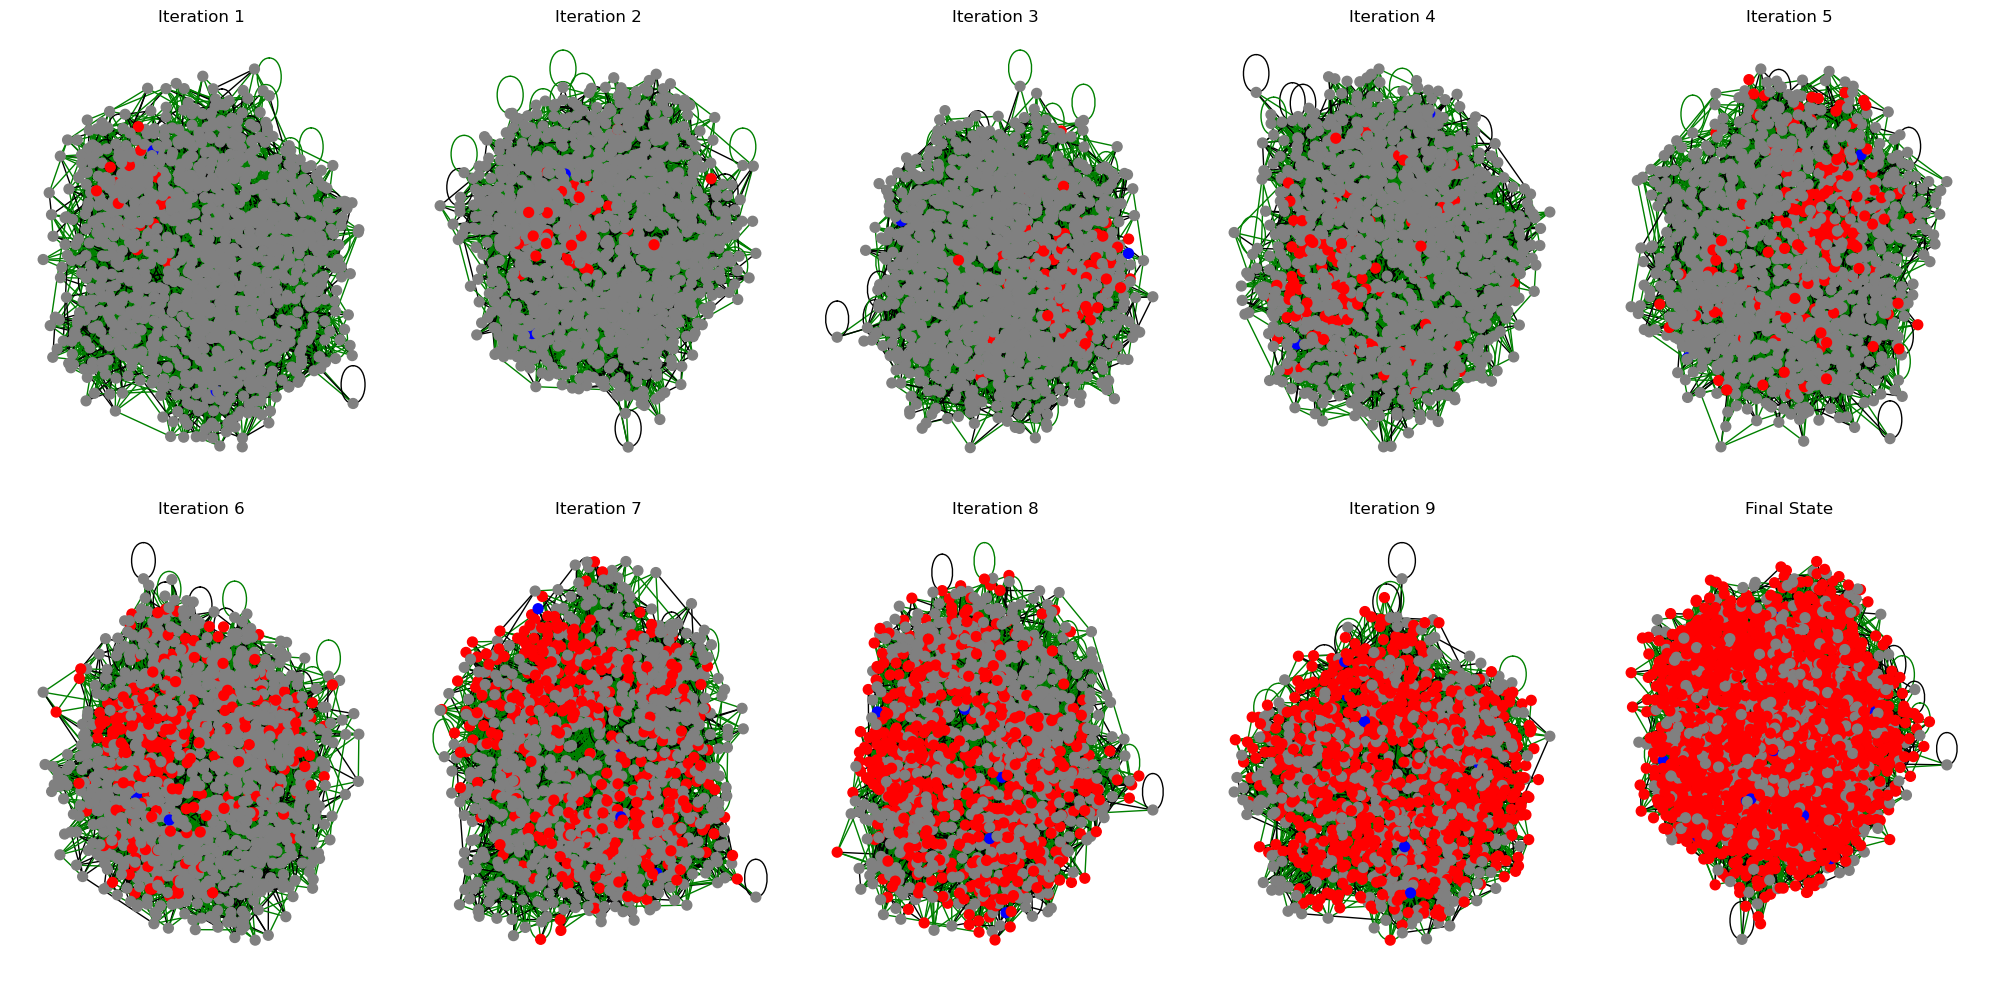

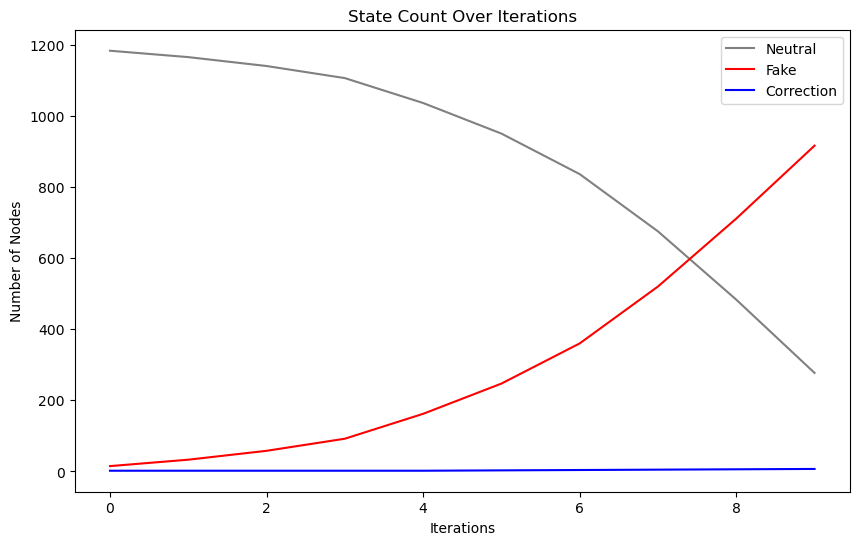

In [1]:
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph
import matplotlib.pyplot as plt
import random
import numpy as np

# LFRネットワークの生成
# n: ノード数, tau1: 次数分布の指数, tau2: コミュニティサイズ分布の指数, mu: ミキシングパラメータ
# min_community, max_community: コミュニティの最小/最大サイズ
n = 1200  # ノード数
tau1 = 3  # 次数分布の指数
tau2 = 1.5  # コミュニティサイズ分布の指数
mu = 0.1  # ノードが異なるコミュニティに接続する割合
min_community = 50  # コミュニティの最小サイズ
max_community = 100  # コミュニティの最大サイズ

# LFRベンチマークグラフの生成
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=10, min_community=min_community, max_community=max_community, seed=42, max_iters=500)

# ノードの初期設定
# fake_spread_prob: 偽情報を拡散する確率, correction_spread_prob: 修正情報を拡散する確率
# iteration_delay: 修正情報の発信を遅らせるイテレーション数, iterations: シミュレーションの反復回数
fake_spread_prob = 0.6  # 偽情報を拡散する確率
correction_spread_prob = 0.3  # 修正情報を拡散する確率（修正情報を強化）
initial_correction_spreaders = 2  # 修正情報を拡散する初期ノードの数
iteration_delay = 5  # 修正情報が拡散を始めるまでの遅延イテレーション数
iterations = 10  # シミュレーションの反復回数

# エッジに符号（正または負）を付与する
# 正のエッジは「信頼」の関係、負のエッジは「不信」の関係を示す
positive_ratio = 0.7  # 正のエッジの割合
negative_ratio = 0.3  # 負のエッジの割合
for u, v in G.edges:
    if random.random() < positive_ratio:
        G.edges[u, v]['sign'] = 1  # 正のエッジ
    else:
        G.edges[u, v]['sign'] = -1  # 負のエッジ

# 各ノードの状態を初期化
# neutral: 中立, fake: 偽情報を持っている, correction: 修正情報を持っている
for node in G.nodes:
    G.nodes[node]['state'] = 'neutral'  # 全てのノードを中立で初期化
    G.nodes[node]['fake_prob'] = fake_spread_prob  # 偽情報の拡散確率
    G.nodes[node]['correction_prob'] = correction_spread_prob  # 修正情報の拡散確率
    G.nodes[node]['trust'] = random.uniform(0.7, 1.0)  # 各ノードにランダムな信頼度を設定

# 次数の高いノードの1つを偽情報発信者に設定
highest_degree_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
highest_degree_node = random.choice(highest_degree_nodes[:3])[0]  # 上位3つからランダムに選択
G.nodes[highest_degree_node]['state'] = 'fake'  # 偽情報を発信するノードに設定

# 初期の修正情報発信者を設定する関数
# neutral状態のノードの中から修正情報を発信するノードを選択
def set_initial_correction_spreaders(G, initial_correction_spreaders):
    neutral_nodes = [node for node in G.nodes if G.nodes[node]['state'] == 'neutral']
    chosen_nodes = random.sample(neutral_nodes, initial_correction_spreaders)
    for node in chosen_nodes:
        G.nodes[node]['state'] = 'correction'

set_initial_correction_spreaders(G, initial_correction_spreaders)

# ベイズ更新を使用して、各ノードの情報拡散確率を更新
def bayesian_update(prior, likelihood, evidence):
    return (likelihood * prior) / ((likelihood * prior) + ((1 - evidence) * (1 - prior)))

# 情報の拡散をシミュレーションする関数
def spread_information(G, iteration, delay):
    new_states = {}  # 各イテレーションで更新される新しい状態を記録
    for node in G.nodes:
        if G.nodes[node]['state'] == 'neutral':  # 中立ノードのみ影響を受ける
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = random.choice(neighbors)
                if G.nodes[chosen_neighbor]['state'] == 'fake':
                    # 偽情報の拡散確率を信頼度に基づいて調整
                    adjusted_fake_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['fake_prob']
                    G.nodes[node]['fake_prob'] = bayesian_update(G.nodes[node]['fake_prob'], adjusted_fake_prob, 1)
                    if random.random() < G.nodes[node]['fake_prob']:
                        new_states[node] = 'fake'  # 偽情報に感染
                elif G.nodes[chosen_neighbor]['state'] == 'correction' and iteration >= delay:
                    # 修正情報の拡散確率を信頼度に基づいて調整
                    adjusted_correction_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['correction_prob']
                    G.nodes[node]['correction_prob'] = bayesian_update(G.nodes[node]['correction_prob'], adjusted_correction_prob, 1)
                    if random.random() < G.nodes[node]['correction_prob']:
                        new_states[node] = 'correction'  # 修正情報に感染

    # ノードの状態を更新
    for node, new_state in new_states.items():
        G.nodes[node]['state'] = new_state

# 各状態（neutral, fake, correction）のノード数をカウントする関数
def count_states(G):
    state_count = {'neutral': 0, 'fake': 0, 'correction': 0}
    for node in G.nodes:
        state = G.nodes[node]['state']
        state_count[state] += 1
    return state_count

# グラフを可視化する関数（ノードラベル非表示、ノードサイズを縮小）
def visualize_graph(G, title, ax):
    color_map = {'neutral': 'gray', 'fake': 'red', 'correction': 'blue'}
    edge_color_map = {1: 'green', -1: 'black'}
    colors = [color_map[G.nodes[node]['state']] for node in G.nodes]
    edge_colors = [edge_color_map[G.edges[edge]['sign']] for edge in G.edges]
    pos = nx.spring_layout(G)  # もしくは nx.kamada_kawai_layout(G) を試してもよい
    nx.draw(G, pos, node_color=colors, edge_color=edge_colors, with_labels=False, node_size=50, ax=ax)  # ラベル非表示
    ax.set_title(title)

# シミュレーションを実行し、各イテレーションの状態を記録・可視化
state_counts = {'neutral': [], 'fake': [], 'correction': []}
fig, axs = plt.subplots(2, (iterations + 1) // 2, figsize=(20, 10))
axs = axs.flatten()

# イテレーションごとに情報拡散をシミュレートし、状態を更新
for i in range(iterations):
    spread_information(G, i, iteration_delay)
    current_state_count = count_states(G)
    for state, count in current_state_count.items():
        state_counts[state].append(count)
    visualize_graph(G, f"Iteration {i + 1}", axs[i])

# 最終状態の可視化
visualize_graph(G, "Final State", axs[-1])
plt.tight_layout()
plt.show()

# イテレーションごとの状態数をプロット
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), state_counts['neutral'], label='Neutral', color='gray')
plt.plot(range(iterations), state_counts['fake'], label='Fake', color='red')
plt.plot(range(iterations), state_counts['correction'], label='Correction', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Number of Nodes')
plt.title('State Count Over Iterations')
plt.legend()
plt.show()
